# 0. Загрузка и соединение таблиц

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as nз

In [7]:
flights = pd.read_csv('flights.csv', index_col=0)
weather = pd.read_csv('weather.csv', index_col=0)
flights = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

## 1. Средняя задержка по месяцам

Text(0, 0.5, 'Общее количество задержек')

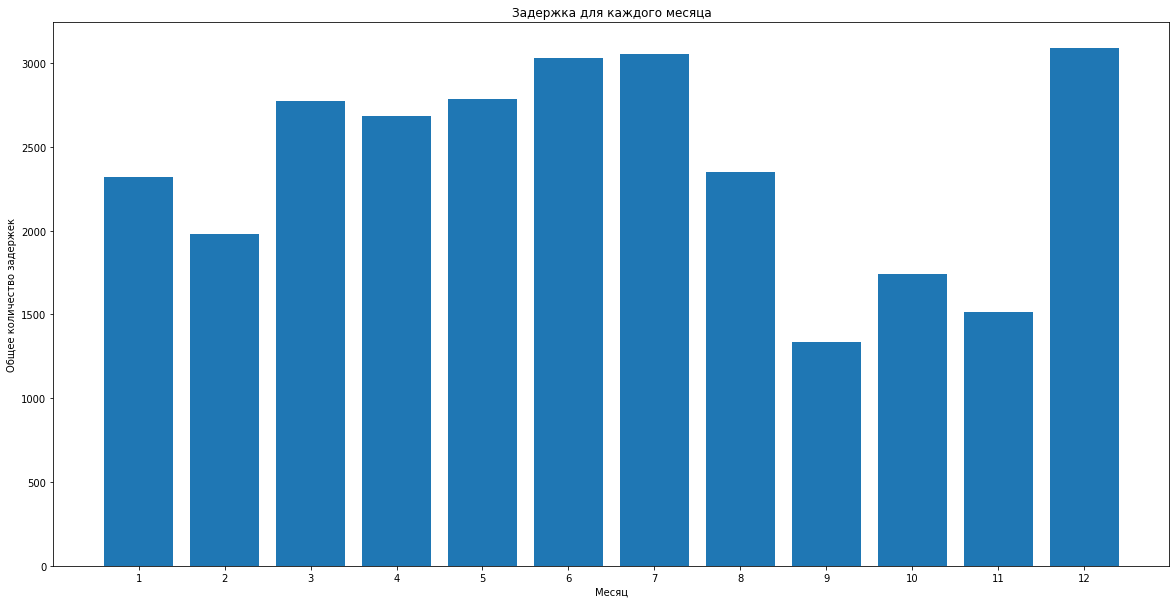

In [15]:
plt.figure(figsize=(20,10))

delay_mask = flights.dep_delay > 15


delays = flights[delay_mask].groupby('month').count()['arr_delay']
delays = delays.sort_index()

plt.bar(range(len(delays)), delays)
plt.xticks(range(len(delays)), delays.index)

plt.title('Задержка для каждого месяца')
plt.xlabel('Месяц')
plt.ylabel('Общее количество задержек')

Задержкой будем считать опоздание самолёта больше, чем на 15 минут, как это принято в авиакомпаниях.

# 2.Нахождение дня наибольшей и наименьшей задержки

In [27]:
flights.groupby(['year','month','day']).mean()['arr_delay'].idxmax()

(2013, 3, 8)

In [26]:
flights.groupby(['year','month','day']).mean()['arr_delay'].idxmin()

(2013, 9, 7)

В итоге мы видим, что наибольшая средняя задержка произошла в праздник - 8-ого марта. А наименьшая в обычный день - 7-ого сентября.

# 3. А какой процент рейсов прошёл без задержек?

0.24628361378580993


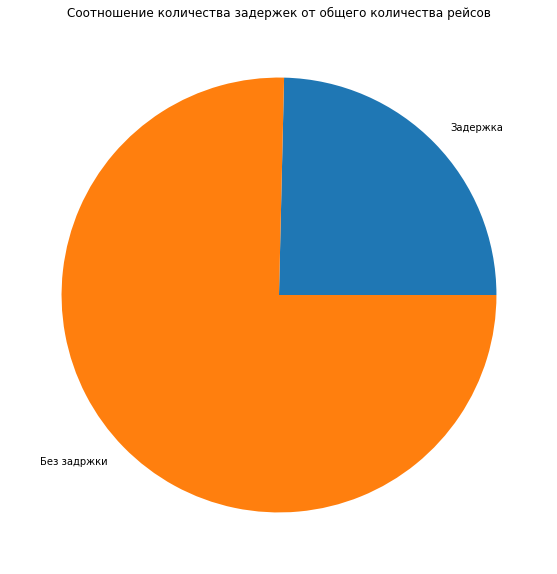

In [32]:
plt.figure(figsize=(20,10))

plt.pie([delay_mask.sum(), flights.shape[0] - delay_mask.sum()], labels=['Задержка', 'Без задржки'])

plt.title('Соотношение количества задержек от общего количества рейсов')

print(delay_mask.sum()/flights.shape[0])

В итоге видим, что процент рейсов с задержкой составляет практически 25%, а если быть точнее, то 24.63%.

# 4. У какого перевозчика самая большая задержка?

In [34]:
flights.carrier.value_counts()

UA    45468
EV    41648
B6     6493
WN     6057
US     4313
DL     4309
AA     3386
MQ     2105
VX     1552
9E     1204
AS      710
OO        6
Name: carrier, dtype: int64

In [37]:
flights.groupby('carrier').mean()['arr_delay']

carrier
9E     1.682540
AA     0.988396
AS    -9.991513
B6     9.497223
DL     8.772611
EV    17.005262
MQ    16.259790
OO    21.500000
UA     3.477161
US     0.945695
VX    -0.745478
WN    11.054892
Name: arr_delay, dtype: float64

In [39]:
flights.groupby('carrier').mean()['arr_delay'].idxmax()

'OO'

В итоге мы понимаем, что у перевозчика под скоращением "OO" самая большая средняя задержка среди всех представленных в таблице.

# 5. Узнаем задержку в зависимости от города, куда летит самолёт

Text(0.5, 0, 'средняя задержка')

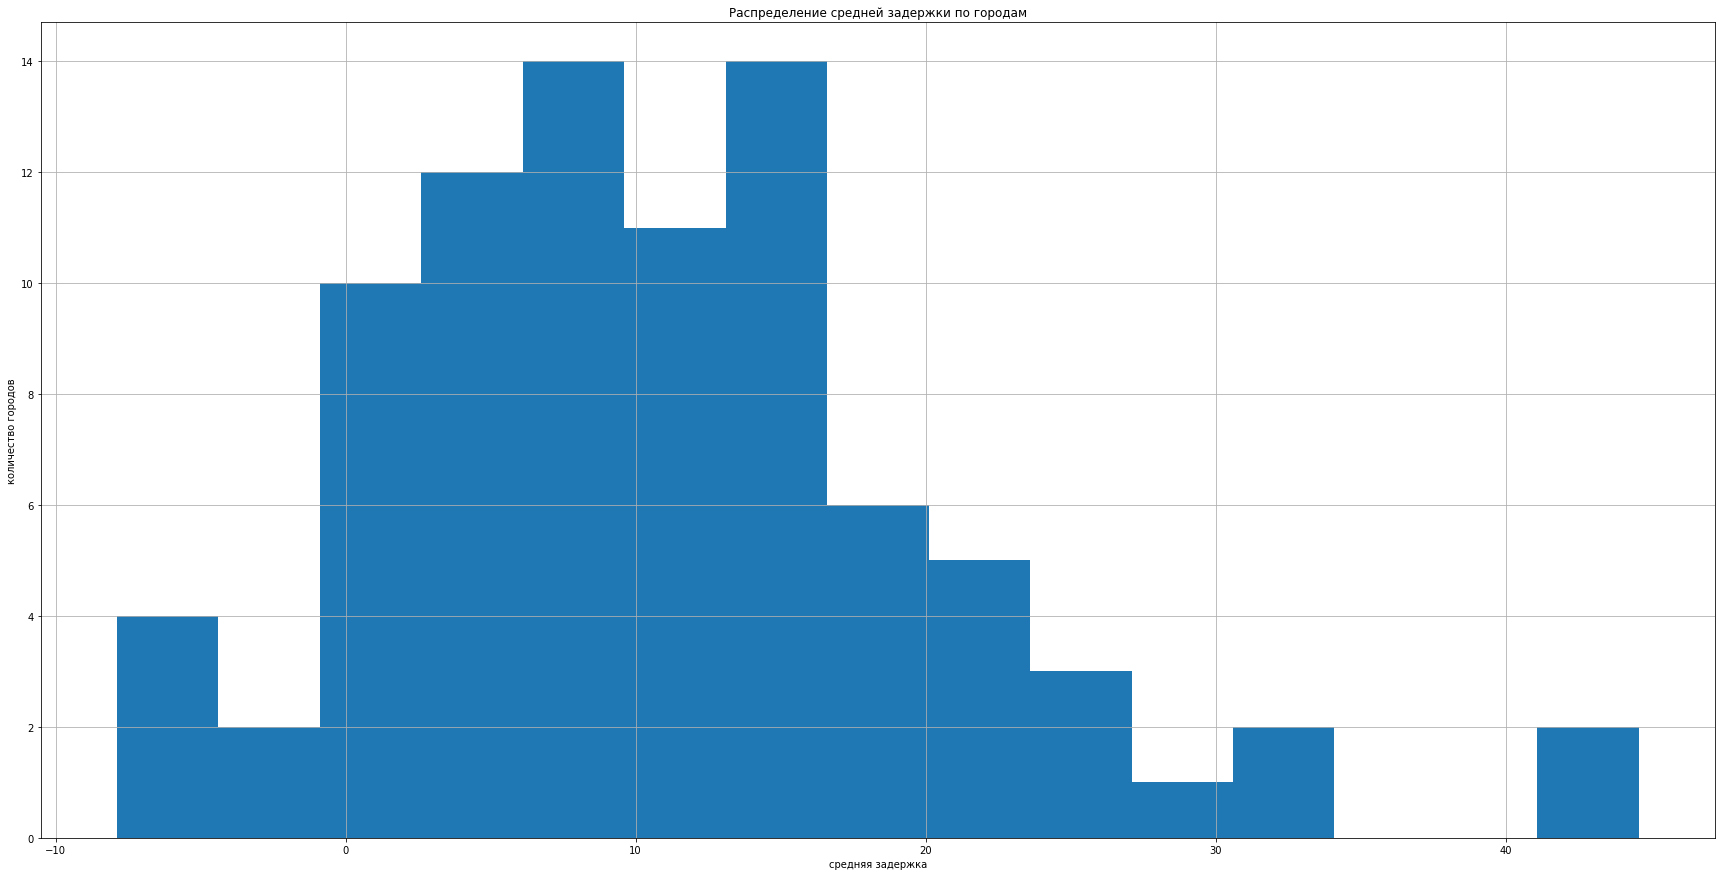

In [41]:
plt.figure(figsize=(30,15))

delays = flights.groupby('dest').mean()['arr_delay']
delays = delays.sort_values()

delays.hist(bins=15)

plt.title('Распределение средней задержки по городам')
plt.ylabel('количество городов')
plt.xlabel('средняя задержка')

In [42]:
delays[-6:-1]

dest
RIC    25.866460
JAC    29.894737
OKC    30.619048
TUL    33.818493
TYS    41.426282
Name: arr_delay, dtype: float64

Теперь мы понимаем, что наибольшая средняя задержка происходит, когда самолёты летят в TYS.

# 6. В какой город лететь дольше всего и будет ли он тем же, что и город с самой большой задержкой?

In [74]:
flights.groupby('dest').mean()['air_time']

dest
ALB     31.793765
ANC    413.125000
ATL    111.966056
AUS    211.210471
AVL     89.736000
BDL     25.470732
BNA    114.449574
BOS     40.315870
BQN    196.206780
BTV     46.265537
BUF     51.175214
BWI     37.170498
BZN    258.371429
CAE     92.148936
CHS     95.702016
CLE     66.287203
CLT     84.951159
CMH     76.302190
CVG     96.048284
DAY     86.054028
DCA     42.630032
DEN    224.880969
DFW    197.004992
DSM    149.525773
DTW     84.816939
EGE    253.584906
FLL    152.044636
GRR     96.696793
GSO     71.841802
GSP     93.189855
          ...    
ORF     51.229205
PBI    144.895735
PDX    329.377660
PHL     28.666667
PHX    290.107623
PIT     57.069943
PVD     32.674157
PWM     48.723521
RDU     69.597173
RIC     53.541615
ROC     45.328542
RSW    156.724138
SAN    325.208556
SAT    221.219814
SAV    107.288660
SBN     93.500000
SDF    106.460094
SEA    325.815470
SFO    342.862663
SJU    201.006598
SLC    271.200000
SNA    329.241677
STL    134.267201
STT    206.278075
SYR  

In [68]:
print(flights.groupby('dest').mean()['air_time'].idxmax())

HNL


Город, в который среднее время полёта наибольшее это NHL. А город с самой большой задержкой, даже близко не на первом месте, время в пути до него всего 97 минут.

# 7. Зависимость задержки от видимости

Text(0, 0.5, 'средняя задержка')

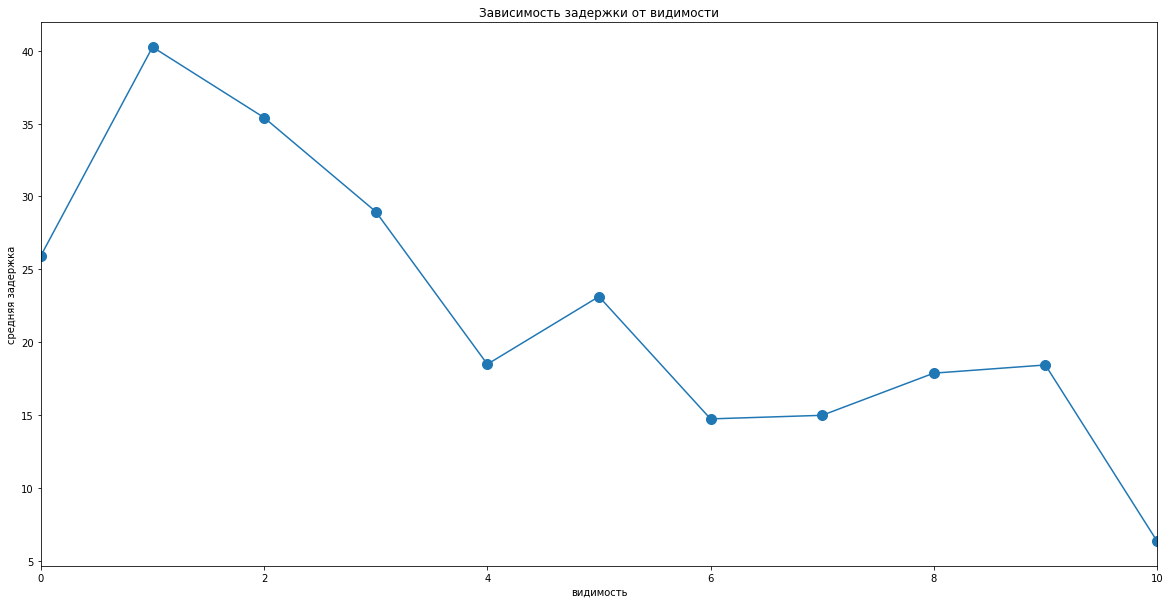

In [70]:
plt.figure(figsize=(20,10))

flights['visib'] = flights['visib']

visib_delay = flights.groupby('visib').mean()['arr_delay']
plt.scatter(visib_delay.index, visib_delay, s=100)
visib_delay.plot()

plt.title('Зависимость задержки от видимости')
plt.xlabel('Видимость')
plt.ylabel('Средняя задержка')

Понятно, что чем ниже видимость, тем больше задержка, так как часто самолёты просто не могут вылететь, пока не станет видно дальше.

# 8. Задержка в зависимости от аэропорта вылета

Text(0, 0.5, 'Средняя задержка')

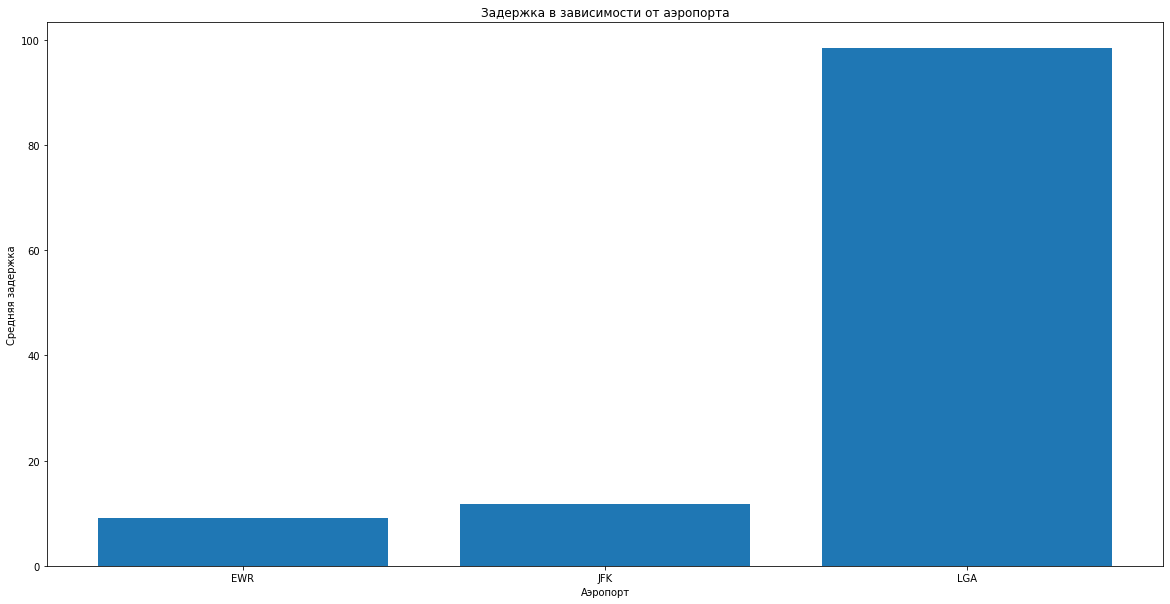

In [76]:
plt.figure(figsize=(20,10))


delays = flights.groupby('origin').mean()['arr_delay']
delays = delays.sort_values()

plt.bar(range(len(delays)), delays)
plt.xticks(range(len(delays)), delays.index)

plt.title('Задержка в зависимости от аэропорта')
plt.xlabel('Аэропорт')
plt.ylabel('Средняя задержка')

Здесь мы видим, что из аэропорта LGA рейсы улетают с наибольшей задержкой

# 9. Зависимость задержки от скорости ветра

Text(0, 0.5, 'Среднее время задержки')

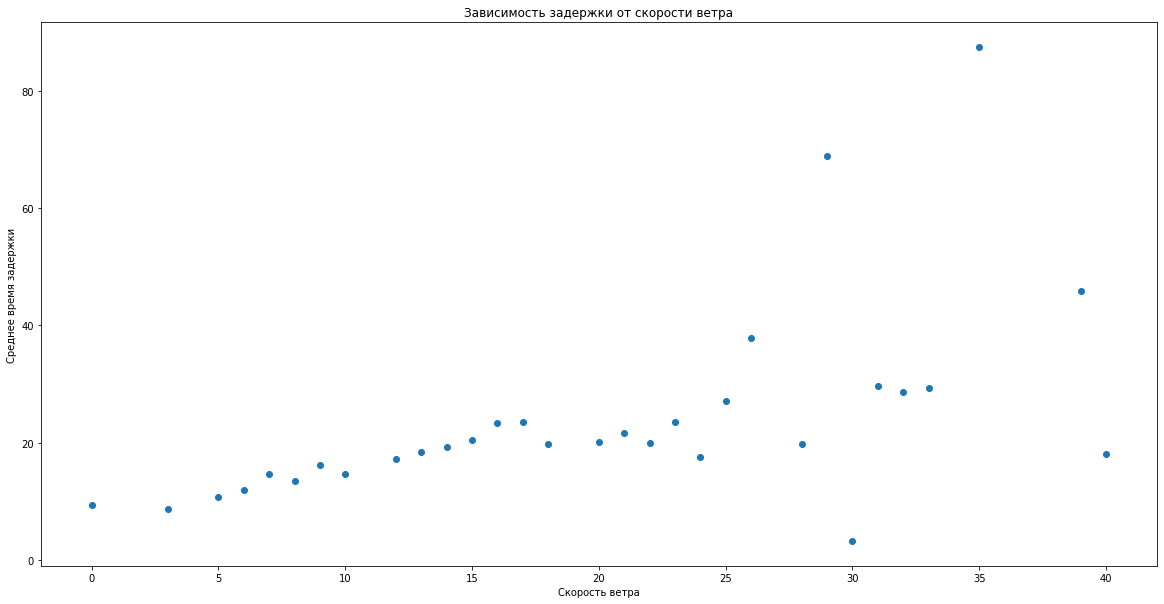

In [77]:
plt.figure(figsize=(20,10))


flights['wind_speed'] = flights.wind_speed.apply(lambda x: x if np.isnan(x) else round(x))

delay = flights.groupby('wind_speed').mean()['dep_delay']
delay = delay.sort_index()
delay = delay.drop(labels=[delay.index[-1]])
plt.scatter(delay.index, delay)

plt.title('Зависимость задержки от скорости ветра')
plt.xlabel('Скорость ветра')
plt.ylabel('Среднее время задержки')

Из этого графика можно сделать вывод, что чем выше скорость ветра, тем скорее всего будет больше задержка.

# 10. Какой номер рейса задерживался чаще всего?

In [99]:
flights.tailnum.value_counts()

N15980    302
N19554    298
N15572    289
N14573    269
N18557    269
N10575    268
N14558    265
N13949    264
N11536    263
N15910    263
N12921    263
N13913    259
N12567    259
N13994    257
N13914    256
N11547    255
N27962    255
N16981    254
N13553    254
N14952    252
N16571    252
N26545    252
N13979    251
N13908    251
N13955    250
N14904    249
N14993    248
N14542    248
N29917    247
N13956    247
         ... 
N611MQ      1
N315AS      1
N306AS      1
N709UW      1
N944DN      1
N3LBAA      1
N3756       1
N633AA      1
N541UW      1
N954DL      1
N57016      1
N737US      1
N921DL      1
N653UA      1
N569AS      1
N834JB      1
N967DL      1
N857MQ      1
N3KUAA      1
N7744A      1
N704X       1
N324AA      1
N809AW      1
N905DE      1
N507US      1
N827AS      1
N820AW      1
N645SW      1
N877AS      1
N5FBAA      1
Name: tailnum, Length: 3058, dtype: int64

In [100]:
flights.groupby('tailnum').mean()['arr_delay']

tailnum
N0EGMQ     9.217391
N10156    12.126761
N102UW    -2.956522
N103US    -7.782609
N104UW    -4.720000
N10575    20.988679
N105UW    -5.560000
N107US     0.235294
N108UW    -7.914286
N109UW    -4.875000
N110UW     1.761905
N11106    14.624000
N11107    13.601449
N11109    15.078571
N11113    16.387097
N11119    28.894737
N11121    10.306122
N11127    13.372881
N11137    20.660377
N11140    18.312057
N11150     8.914062
N11155    12.989583
N11164    21.941176
N11165     8.394558
N11176    20.790698
N11181     9.075000
N11184     7.141732
N11187    11.136000
N11189     6.845588
N11191    22.090164
            ...    
N970DL    23.000000
N973DL   -18.000000
N974DL   -16.000000
N976DL    -5.000000
N977AT     7.934426
N978AT    18.780488
N978DL   -16.000000
N979AT    21.026316
N979DL   -14.000000
N980DL    -5.000000
N981AT    13.523810
N981DL   -38.000000
N982DL   -30.000000
N986DL    75.000000
N987DL     4.000000
N988DL     7.000000
N989AT    23.175000
N989DL    13.500000
N990AT    21

In [101]:
print(flights.groupby('tailnum').mean()['arr_delay'].idxmax())

N943DL


In [103]:
df_filter = flights['tailnum'].isin(['N943DL'])
flights[df_filter]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
14101,2013,10,14,2042.0,702.0,2255.0,688.0,DL,N943DL,502,...,42.0,64.04,48.92,57.87,140.0,6.0,6.621473,0.0,1024.4,10
55234,2013,3,26,1236.0,-2.0,1421.0,-13.0,DL,N943DL,1544,...,36.0,39.92,30.92,69.96,280.0,7.0,7.945768,0.0,1007.0,10


Тут мы поняли, что самая большая средняя задержка была у рейса под номером N943DL